In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# --- Helper: Sliding window function ---


def sliding_window_avg(data, window=11):
    return np.convolve(data, np.ones(window) / window, mode='valid')


# --- Simulated Data Generation ---
timesteps = np.linspace(0, 3e6, 100)
window_size = 11


def generate_curve(base, noise=500, growth=2.0):
    raw = growth * np.log1p(timesteps / 1e5) * 1000 + base
    raw += np.random.randn(len(timesteps)) * noise
    mean = sliding_window_avg(raw, window_size)
    std = sliding_window_avg(np.ones_like(raw) * noise, window_size)
    return mean, std


# --- Algorithms & Colors ---
algorithms = {
    "Mujoco": generate_curve(0, 300, 0.5),
    "Brax": generate_curve(0, 200, 1.2),

}

colors = {
    "Mujoco": "blue",
    "Brax": "orange",

}

# --- Adjusted X-axis to match shorter smoothed arrays ---
timesteps_smooth = timesteps[(window_size - 1)//2: -(window_size // 2)]

# --- Plotting ---
plt.figure(figsize=(10, 6))
for name, (mean, std) in algorithms.items():
    plt.plot(timesteps_smooth, mean, label=name, color=colors[name])
    plt.fill_between(timesteps_smooth, mean - std, mean +
                     std, alpha=0.2, color=colors[name])

plt.xlabel("TotalEnvInteracts")
plt.ylabel("Performance")
plt.title("3M timestep benchmark for Ant-v3 using PyTorch implementations")
plt.legend(fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Found 3 matching files for sac_ant_m50b50_rewards
  - sac_ant_m50b50_rewards_1743604426.csv
  - sac_ant_m50b50_rewards_1743588348.csv
  - sac_ant_m50b50_rewards_1743573725.csv


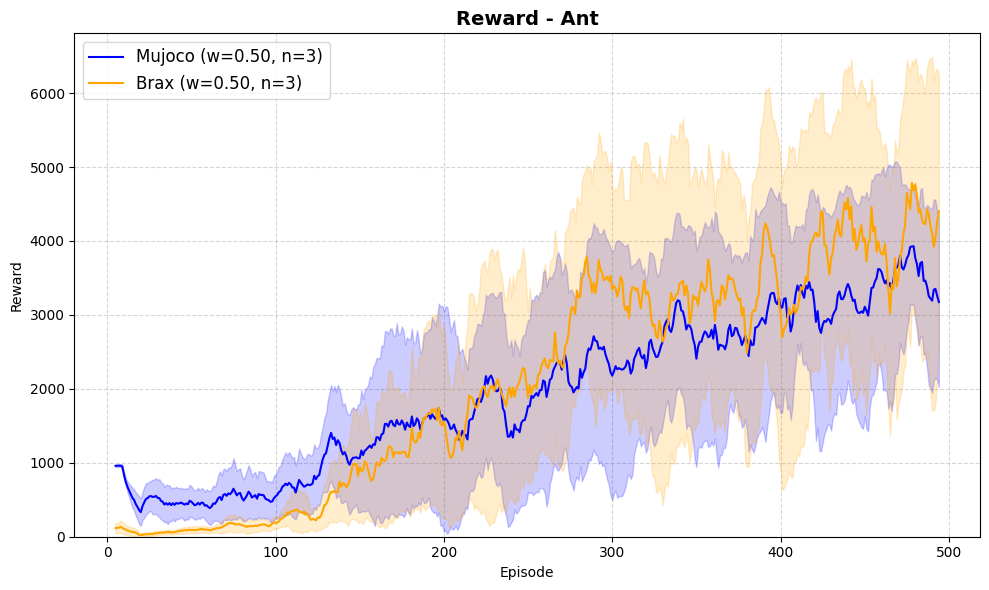

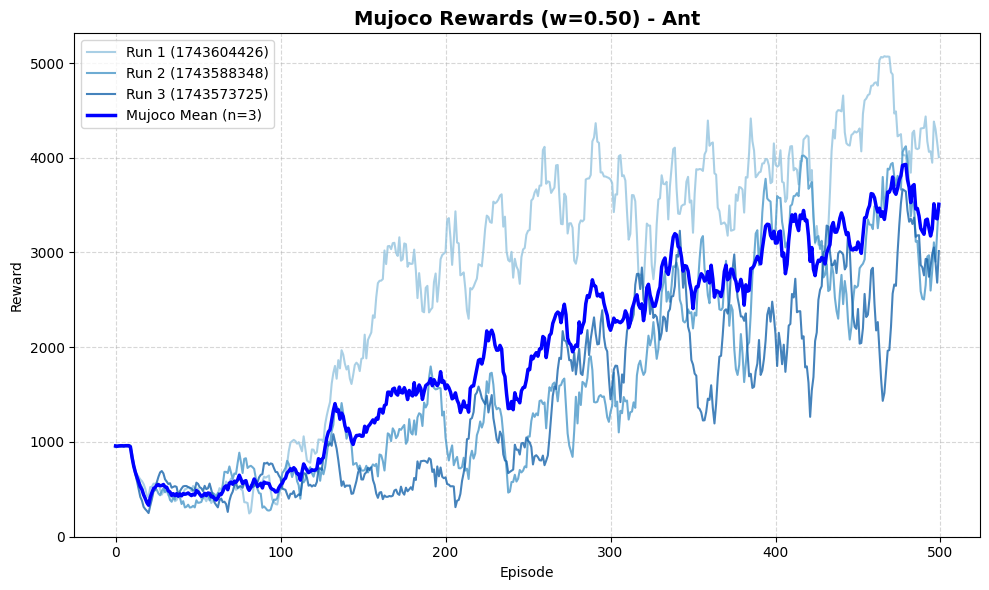

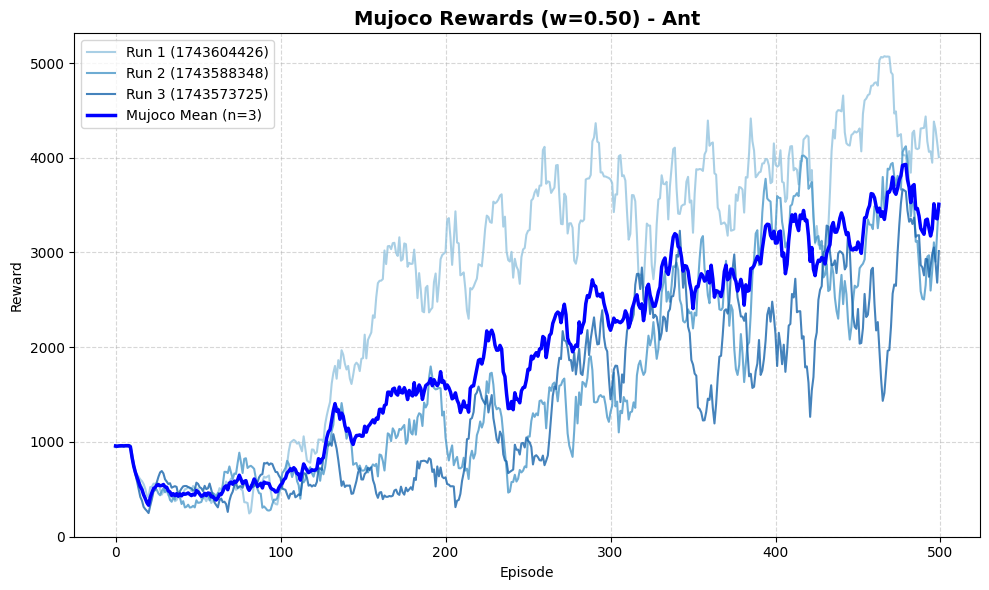

In [7]:
from src.metrics.metric_visualiser import MetricsVisualizer
# Approach 1: Find file by environment and composition
viz = MetricsVisualizer()
viz.get(
    composition={'mujoco': 0.5, 'brax': 0.5},
    agent='sac',
    experiment="ant",
    data_dir="data/"
)
viz.plot_reward()
viz.plot_single_engine('mujoco')

In [ ]:
viz = MetricsVisualizer()
viz.get(
    composition={'mujoco': 0, 'brax': 1},
    agent='sac',
    experiment="halfcheetah",
    data_dir="data/"
)

viz.plot_reward()